## 1. Business understanding

## 2. Data Understanding

In [9]:
# loading libraries

import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# loading and previewing data

data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

### Describing the dataset

In [11]:
# class to describe dataset

class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

In [12]:
# creating an instance of the class describer
describe_df = Describer(data)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 9093 rows
	* 3 columns 



In [13]:
# lets print summary infomation on the dataset
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None 



### summary of data understanding

The dataset has 3 columns  namely:tweet_text, emotion_in_tweet_is_directed_at ,is_there_an_emotion_directed_at_a_brand_or_product   
The  dataset has 9093 rows 
All the  dataset's columns are objects


## 3. Data Preparation 

#### Introduction
we will be preparing our data for analysis by checking for attributes such as missing values ,duplicates and other inconsistencies as computed below

### missing values

In [14]:
# function to identify missing values

# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

identify_missing_values(data)

The Data has missing values.


In [15]:
# function to display missing values

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_values(data)


Missing Values  Percentage(%)
emotion_in_tweet_is_directed_at            5802       0.638073
tweet_text                                    1       0.000110

In [16]:
# dropping missing row in tweet_text

data.dropna(axis=0,subset=['tweet_text'],inplace=True)

In [17]:
# confirmation

data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                        True
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

In [18]:
# replacing null values in recipient with nan

data['emotion_in_tweet_is_directed_at'].fillna('none', inplace =True)

In [19]:
data['emotion_in_tweet_is_directed_at'].value_counts()

none                               5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [20]:
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                       False
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

####  justification
We discovered that there is ```0.01%``` missing values in tweet_text column and  ```63.81%``` missing values in emotion_in_tweet_is_directed_at column

We replaced the missing values in the ```emotion tweet is directed at column``` with none for computational purposes and dropped the missing valuesin the ```tweet text```   column


### Duplicates

In [21]:
# checking for duplicates

# Duplicated entries
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(data)

The Data has 22 duplicated rows.
This constitutes 0.242% of the data set.


In [22]:
data.duplicated().sum()

22

In [23]:
# handling the duplicates 
def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = identify_duplicates(data)

    return confirm 


remove_duplicated_rows(data)

The Data has no duplicates


We found out that the tweet text column had 22 duplicates ```( 0.242% )``` and went ahead and  dropped  them

In [24]:
# renaming the columns
data = data.rename(columns={'emotion_in_tweet_is_directed_at':'recipient',
                    'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})
data.head()

tweet_text           recipient  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

            emotion  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

```Insight```

We renamed  the column ```emotion_in_tweet_is_directed_at``` to ```recipient``` and the column ```is_there_an_emotion_directed_at_a_brand_or_product``` to ```emotion``` to enhance clarity and facilitate their usage in our subsequent computation


## 4. EDA

#### Introduction
We  will conduct Univariate and Bivariate analysis of the sentiments and create visualizations  to see how they relate with each other and individually.


### Univariate analysis


No emotion toward brand or product    59.261301
Positive emotion                      32.745314
Negative emotion                       6.273429
I can't tell                           1.719956
Name: emotion, dtype: float64


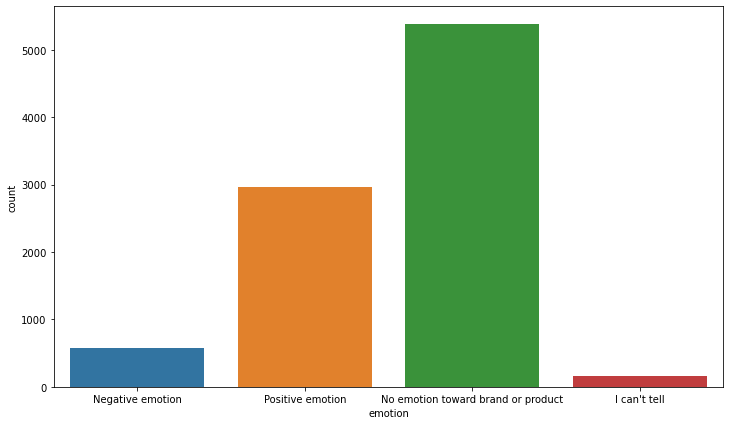

In [25]:
# checking the distribution of emotions

percentage = data['emotion'].value_counts(normalize=True)
print(percentage * 100)

# count plot
plt.figure(figsize=(12, 7))
sns.countplot(data['emotion']);

# Observation

We see that majority of  people had  ```No emotion toward brand or product``` at ```59.26%``` followed by people with ```Positive emotions ``` at ```32.75%```

```I can't tell``` makes up less than ```2%``` of our dataset, and doesn't offer much more information in the way of word significance than the tweets labeled No emotion toward brand or product. We will drop records where emotion has been recorded as ```I can't tell```.

### ***Bivariate analysis***

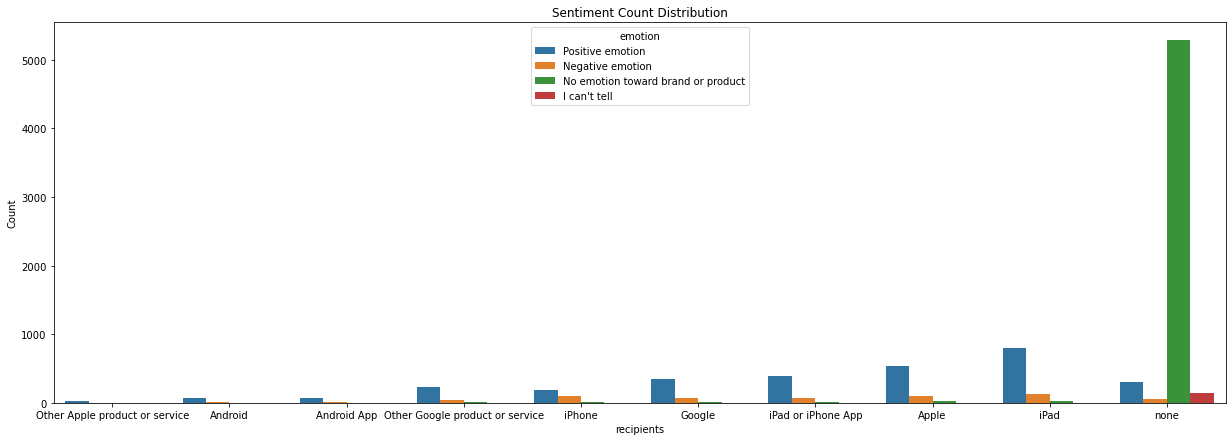

In [26]:
# lets see see sentiment distribution product-wise
recipient_group = data.groupby('recipient')['emotion'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = recipient_group.groupby('recipient')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='recipient', y='count', hue='emotion', data=recipient_group, order=ascending_order)
plt.xlabel('recipients')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.show()

# Interpretation
From the graph above  ```Ipad```  had the ```highest positive emotions``` followed by ```Apple```

In [27]:
data['recipient'].value_counts()

none                               5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: recipient, dtype: int64

In [28]:
# overall brand distribution

# feature engineering
data['brand'] = data['recipient'].map({'Other Apple product or service': 'Apple', 
                                           'Android': 'Google',
                                           'Android App': 'Google',
                                           'Other Google product or service ': 'Google',
                                           'iPhone': 'Apple', 
                                           'Google':'Google',
                                           'iPad or iPhone App': 'Apple',
                                           'Apple':'Apple',
                                           'iPad':'Apple',
                                           'none': 'none'})



In [29]:
data.head(3)

tweet_text           recipient  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   

            emotion  brand  
0  Negative emotion  Apple  
1  Positive emotion  Apple  
2  Positive emotion  Apple

### ***Distribution of brand sentiment***

none      65.945084
Apple     27.389769
Google     6.665148
Name: brand, dtype: float64


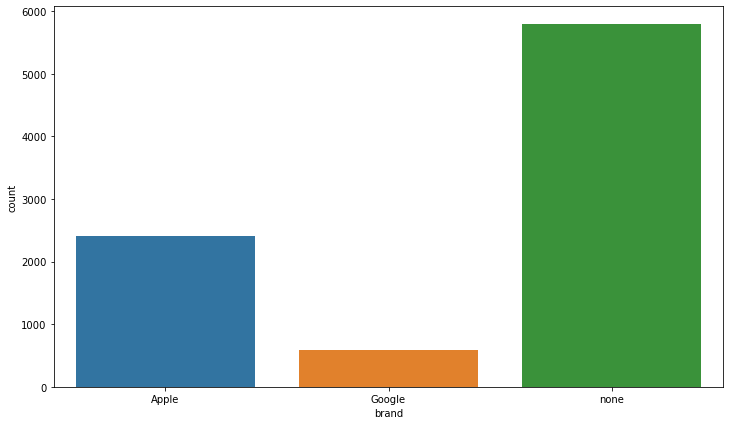

In [30]:
# checking the distribution of brand sentiment

percentage = data['brand'].value_counts(normalize=True)
print(percentage * 100)

# count plot
plt.figure(figsize=(12, 7))
sns.countplot(data['brand']);

#### ***Intepretation***
From the graph above Majority of people had not specified the brand, and for those who did, ```Apple``` had the highest sentiment feedback as compared to ```Google```

In [31]:
#### Distribution based on emotion per brand

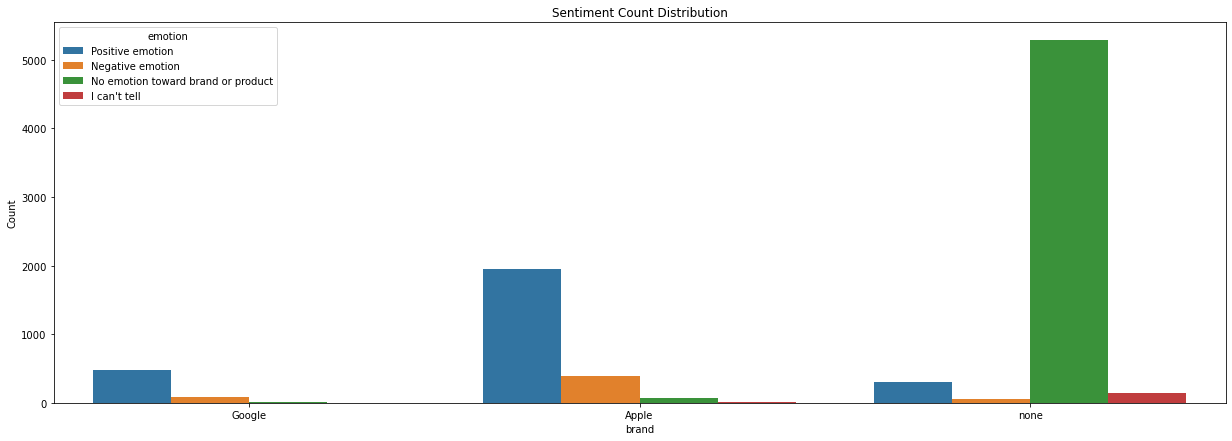

In [32]:
# lets see see sentiment distribution brand-wise
brand_group = data.groupby('brand')['emotion'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = brand_group.groupby('brand')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='brand', y='count', hue='emotion', data=brand_group, order=ascending_order)
plt.xlabel('brand')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.show()

#### ***Intepretation***
From the graph above ```Apple``` had the highest ```positive emotions``` compared to ```Google```


## 5. preprocessing

intro

In [33]:
data.columns

Index(['tweet_text', 'recipient', 'emotion', 'brand'], dtype='object')

In [34]:
# normalizing the data to lowecase
data['tweet_text'] = data['tweet_text'].str.lower()
data.head(2)

tweet_text           recipient  \
0  .@wesley83 i have a 3g iphone. after 3 hrs twe...              iPhone   
1  @jessedee know about @fludapp ? awesome ipad/i...  iPad or iPhone App   

            emotion  brand  
0  Negative emotion  Apple  
1  Positive emotion  Apple

In [35]:
data['tweet_text'][14]

'great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l'

In [36]:
# removing the html tags
def remove_html(review):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', review)

data['tweet_text'] = data['tweet_text'].apply(remove_html)

In [37]:
# removing URL and @ sign

def preprocess_text_removingq_URLand_atsign(text):
    # Remove URLs
    clean_text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r'@[^\s]+', 'user', clean_text)
    # Other preprocessing steps like removing punctuation, converting to lowercase, etc.
    # ...
    return text

data['tweet_text'] = data['tweet_text'].apply(preprocess_text_removingq_URLand_atsign)

In [38]:
data['tweet_text'][14]

'great #sxsw ipad app from user '

In [39]:
data.head()

tweet_text           recipient  \
0  .user i have a 3g iphone. after 3 hrs tweeting...              iPhone   
1  user know about user ? awesome ipad/iphone app...  iPad or iPhone App   
2  user can not wait for #ipad 2 also. they shoul...                iPad   
3  user i hope this year's festival isn't as cras...  iPad or iPhone App   
4  user great stuff on fri #sxsw: marissa mayer (...              Google   

            emotion   brand  
0  Negative emotion   Apple  
1  Positive emotion   Apple  
2  Positive emotion   Apple  
3  Negative emotion   Apple  
4  Positive emotion  Google

In [43]:
# function to remove hash, not alphabet 
!pip install contractions

In [44]:
# expanding the contractions (is-nots)

import contractions
#from nltk.stem import WordNetLemmatizer

def expand(text):
    # Expand contractions
    expanded_text = contractions.fix(text)

    return expanded_text

data['tweet_text'] = data['tweet_text'].apply(expand)

In [45]:
data.tweet_text[3]

"user i hope this year's festival is not as crashy as this year's iphone app. #sxsw"

In [46]:
# punctuation
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [47]:
# remove punctuations
def remove_punctuations(tweet):
    return tweet.translate(str.maketrans('','',exclude))

In [48]:
data['tweet_text']=data['tweet_text'].apply(remove_punctuations)
data.head()

tweet_text           recipient  \
0  user i have a 3g iphone after 3 hrs tweeting a...              iPhone   
1  user know about user  awesome ipadiphone app t...  iPad or iPhone App   
2  user can not wait for ipad 2 also they should ...                iPad   
3  user i hope this years festival is not as cras...  iPad or iPhone App   
4  user great stuff on fri sxsw marissa mayer goo...              Google   

            emotion   brand  
0  Negative emotion   Apple  
1  Positive emotion   Apple  
2  Positive emotion   Apple  
3  Negative emotion   Apple  
4  Positive emotion  Google

In [49]:
data.tweet_text[20]

'need to buy an ipad2 while i am in austin at sxsw not sure if i will need to q up at an austin apple store'

In [50]:
# tokenize the tweets
def tokenize_text(tweet):
    return word_tokenize(tweet)

data['tweet_text'] = data['tweet_text'].apply(tokenize_text)
data.head()

tweet_text           recipient  \
0  [user, i, have, a, 3g, iphone, after, 3, hrs, ...              iPhone   
1  [user, know, about, user, awesome, ipadiphone,...  iPad or iPhone App   
2  [user, can, not, wait, for, ipad, 2, also, the...                iPad   
3  [user, i, hope, this, years, festival, is, not...  iPad or iPhone App   
4  [user, great, stuff, on, fri, sxsw, marissa, m...              Google   

            emotion   brand  
0  Negative emotion   Apple  
1  Positive emotion   Apple  
2  Positive emotion   Apple  
3  Negative emotion   Apple  
4  Positive emotion  Google

In [51]:
# removing stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tweet):
    # Use list comprehension for efficient list creation
    new_tweet = [word for word in tweet if word not in stop_words]
    return " ".join(new_tweet)

# Apply the function to the 'review' column
data['tweet_text'] = data['tweet_text'].apply(remove_stopwords)
data.head()

tweet_text           recipient  \
0  user 3g iphone 3 hrs tweeting riseaustin dead ...              iPhone   
1  user know user awesome ipadiphone app likely a...  iPad or iPhone App   
2                    user wait ipad 2 also sale sxsw                iPad   
3  user hope years festival crashy years iphone a...  iPad or iPhone App   
4  user great stuff fri sxsw marissa mayer google...              Google   

            emotion   brand  
0  Negative emotion   Apple  
1  Positive emotion   Apple  
2  Positive emotion   Apple  
3  Negative emotion   Apple  
4  Positive emotion  Google

In [52]:
data.emotion.value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: emotion, dtype: int64

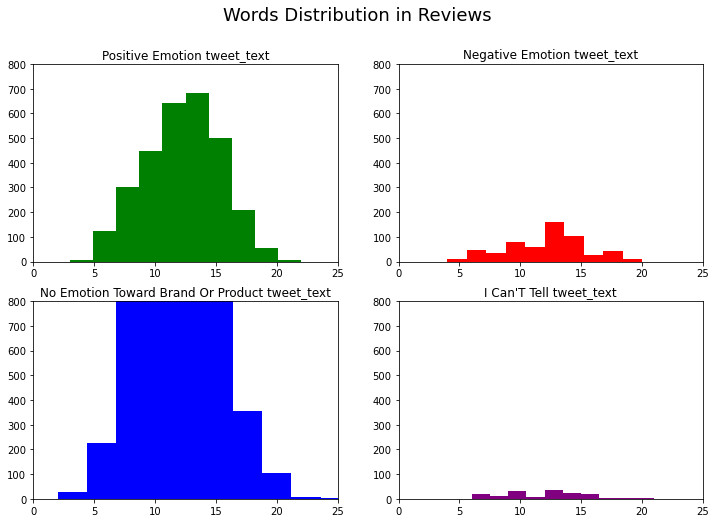

In [53]:
def generate_review_hist_plot(data, label, color, ax):
    tweet_len = data[data['emotion']==label].tweet_text.str.split().map(lambda x: len(x))
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 800)
    ax.hist(tweet_len, color=color)
    ax.set_title(f'{label.title()} tweet_text')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
generate_review_hist_plot(data,'Positive emotion','green',ax[0,0])
generate_review_hist_plot(data,'Negative emotion','red',ax[0,1])
generate_review_hist_plot(data,'No emotion toward brand or product','blue',ax[1,0])
generate_review_hist_plot(data,"I can't tell",'purple',ax[1,1])

fig.suptitle("Words Distribution in Reviews", fontsize=18)

plt.show()

In [54]:
# re-tokenizing the data

data['tweet_text'] = data['tweet_text'].apply(tokenize_text)
data.head()

tweet_text           recipient  \
0  [user, 3g, iphone, 3, hrs, tweeting, riseausti...              iPhone   
1  [user, know, user, awesome, ipadiphone, app, l...  iPad or iPhone App   
2            [user, wait, ipad, 2, also, sale, sxsw]                iPad   
3  [user, hope, years, festival, crashy, years, i...  iPad or iPhone App   
4  [user, great, stuff, fri, sxsw, marissa, mayer...              Google   

            emotion   brand  
0  Negative emotion   Apple  
1  Positive emotion   Apple  
2  Positive emotion   Apple  
3  Negative emotion   Apple  
4  Positive emotion  Google

In [55]:
data.tweet_text[0]

['user',
 '3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'riseaustin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw']

In [56]:
# justifications of retokenizing

### frequency distribution after removing stopwords

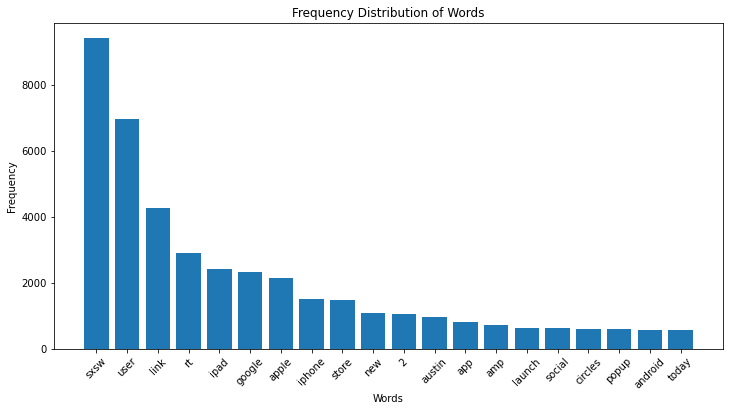

In [57]:
tweet_texts = data.tweet_text
# Flatten the list of tokens into a single list
all_tokens = [tweet for sublist in tweet_texts for tweet in sublist]

# Create the frequency distribution
freq_dist = FreqDist(all_tokens)

# Get the most common words
most_common = freq_dist.most_common(20)  # Example: Top 20 most common words

# Extract the words and frequencies
words, frequencies = zip(*most_common)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Words')
plt.xticks(rotation=45)
plt.show()

#### ***justification***
Just by looking at this, we can see there is a high occurence of

* venue specific words such as ```sxsw```

* twitter specific words such as ```rt```

* brand or product specific words such as ```iphone```

These words probably occur across our various sentiments and may not necessarily add any meaning, unless a majority of their occurence is associated with a particular emotion

In [58]:
# lemmatization

# Create Lemmatizer and Stemmer.
word_lem = WordNetLemmatizer()

# function
def lem_words(tweet):
    return [word_lem.lemmatize(word) for word in tweet]

In [59]:
data['tweet_text'] = data['tweet_text'].apply(lem_words)
data['tweet_text'].head()

0    [user, 3g, iphone, 3, hr, tweeting, riseaustin...
1    [user, know, user, awesome, ipadiphone, app, l...
2              [user, wait, ipad, 2, also, sale, sxsw]
3    [user, hope, year, festival, crashy, year, iph...
4    [user, great, stuff, fri, sxsw, marissa, mayer...
Name: tweet_text, dtype: object

#### dealing with emojis

In [60]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [61]:
def process(tweets):
    
    processed_tweet = []
    
    
    # Defining regex patterns.
    
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in tweets:
        
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])              
            # Replace 3 or more consecutive letters by 2 letter.
            tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        processed_tweet.append(tweet)
        
    return processed_tweet

In [62]:
data['tweet_text'] = data['tweet_text'].apply(process)
data.head()

tweet_text           recipient  \
0  [user, 3g, iphone, 3, hr, tweeting, riseaustin...              iPhone   
1  [user, know, user, awesome, ipadiphone, app, l...  iPad or iPhone App   
2            [user, wait, ipad, 2, also, sale, sxsw]                iPad   
3  [user, hope, year, festival, crashy, year, iph...  iPad or iPhone App   
4  [user, great, stuff, fri, sxsw, marissa, mayer...              Google   

            emotion   brand  
0  Negative emotion   Apple  
1  Positive emotion   Apple  
2  Positive emotion   Apple  
3  Negative emotion   Apple  
4  Positive emotion  Google

In [63]:
data.tweet_text[0]

['user',
 '3g',
 'iphone',
 '3',
 'hr',
 'tweeting',
 'riseaustin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw']

# vectorization

In [64]:
# create instance
bow = CountVectorizer()
data['lemmatized_review'] = data['tweet_text'].str.join(" ")
x = bow.fit_transform(data['lemmatized_review'])

In [66]:
feature_name = bow.get_feature_names_out_()
feature_name

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out_'

In [ ]:
# write observation of code above

### label encoding the target

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data['emotion_code'] = le.fit_transform(data.emotion)
le.classes_

array(["I can't tell", 'Negative emotion',
       'No emotion toward brand or product', 'Positive emotion'],
      dtype=object)

In [ ]:
data.head()

tweet_text           recipient  \
0  [user, 3g, iphone, 3, hr, tweeting, riseaustin...              iPhone   
1  [user, know, user, awesome, ipadiphone, app, l...  iPad or iPhone App   
2            [user, wait, ipad, 2, also, sale, sxsw]                iPad   
3  [user, hope, year, festival, crashy, year, iph...  iPad or iPhone App   
4  [user, great, stuff, fri, sxsw, marissa, mayer...              Google   

            emotion   brand  \
0  Negative emotion   Apple   
1  Positive emotion   Apple   
2  Positive emotion   Apple   
3  Negative emotion   Apple   
4  Positive emotion  Google   

                                   lemmatized_review  emotion_code  
0  user 3g iphone 3 hr tweeting riseaustin dead n...             1  
1  user know user awesome ipadiphone app likely a...             3  
2                    user wait ipad 2 also sale sxsw             3  
3  user hope year festival crashy year iphone app...             1  
4  user great stuff fri sxsw marissa mayer google...             3

In [ ]:
# displaying the encoding scheme
data[['emotion', 'emotion_code']].head(10)

emotion  emotion_code
0                     Negative emotion             1
1                     Positive emotion             3
2                     Positive emotion             3
3                     Negative emotion             1
4                     Positive emotion             3
5   No emotion toward brand or product             2
7                     Positive emotion             3
8                     Positive emotion             3
9                     Positive emotion             3
10                    Positive emotion             3

## binary classification

In [68]:
data_copy = data.copy()

In [69]:
# Define the values to drop
values_to_drop = [0, 2]

# Drop rows that have the values in column 'B'
data_copy = data_copy[~data_copy['emotion_code'].isin(values_to_drop)]

KeyError: 'emotion_code'

In [71]:
binary_percentage = data_copy['emotion_code'].value_counts()/len(data_copy)*100
binary_percentage

KeyError: 'emotion_code'

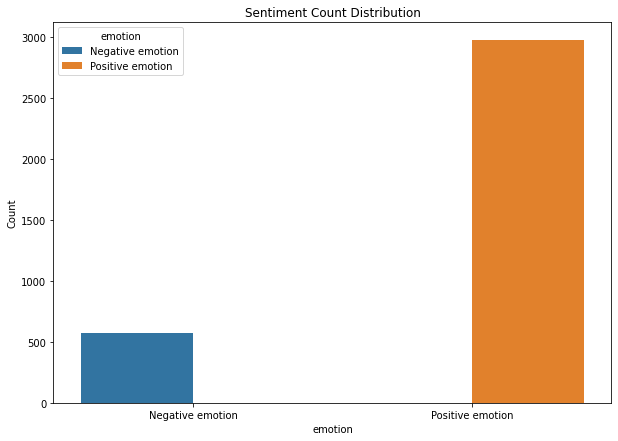

In [ ]:
# lets see see binary sentiment distribution emotion-wise
emotion_group = data_copy.groupby('emotion')['emotion_code'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = emotion_group.groupby('emotion')['count'].sum().sort_values().index

plt.figure(figsize=(10,7))
sns.barplot(x='emotion', y='count', hue='emotion', data=emotion_group, order=ascending_order)
plt.xlabel('emotion')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.show()

# intepretation
From the above graph majority of the tweets from a binary classification had a ```positive emotion``` at ``` ``` compared to the tweets with ```negative emotions```  t ``` ```

In [ ]:
# create instance
bow2 = CountVectorizer()
data_copy['lemmatized_review'] = data_copy['tweet_text'].str.join(" ")
x2 = bow2.fit_transform(data_copy['lemmatized_review'])

### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
#x = bow.fit_transform(data['lemmatized_review'])
y = data_copy['emotion_code']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((2831, 5871), (2831,))

# Modelling

In [ ]:
# instantiating model 1
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

In [ ]:
print('train',accuracy_score(y_train, y_train_pred))
print('test',accuracy_score(y_test, y_pred))

train 0.9699752737548569
test 0.903954802259887


In [ ]:
# test model here